This is a simple Logistic Regression Tutorial. I have created a simulated data from sklearn.dataset for binary class with balance 
weights in both class. I used only two features in order to visualize some inportant stuffs and it can be easily extended to the higher dimensions.Lets begin the tutorial from scratch in order to better understand

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,auc,confusion_matrix,precision_recall_curve

In [124]:
X,y=make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, 
                        n_clusters_per_class=2, weights=[0.5,0.5], 
                        flip_y=0.01, class_sep=1.0, hypercube=True, 
                        shift=0.0, scale=1.0, shuffle=True, random_state=None)

After creating the artifical data, lets split it into train and test set with 70-30 rule.

In [125]:
X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=.3,random_state=42) 

Here is a visualization of the plot of how these classes are distributed in the space. 

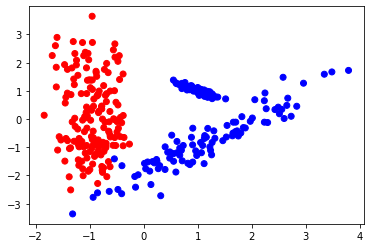

In [126]:
colors=['red' if l==0 else 'blue' for l in y_train]
plt.scatter(X_train[:, 0], X_train[:, 1], label='Logistics regression', color=colors)
#plt.plot(x_values, y_values, label='Decision Boundary')

Lets create the prediciton equation, loss function and gradient update equation. I have used the gradient decesendent method to 
tune the parameters of the Logistics Regression. For the data $D=\{x,y\}$ with $x\in \Re^n$ and $y\in {0,1}$. Lets also assume that the lenght of the data is $m$. The Prediction equation is:
          $$h_{\theta}(x)=\frac{1}{1+\exp{(-\sum_j\theta_j x_j)}}$$
The loss function is :
$$J(\theta)=\frac{1}{m}\sum_{i=1}^m[-y^i\log(h_{\theta}(x^i))
                -(1-y^i)\log(1-h_{\theta}(x^i))]+\frac{\lambda}{2m}\sum_{j=1}^n\theta_j^2.$$
To update the parameter in Gradient Descendent(GD), we need the derivative of the loss function with respect to the $\theta$:
\
For $j$=0:
$$\frac{dJ(\theta)}{d\theta_j}=(\frac{1}{m}\sum_{i=1}^m(h_{\theta}(x^{i})-y^i)x_j^i)$$ 
For $j$>0:
$$\frac{dJ(\theta)}{d\theta_j}=(\frac{1}{m}\sum_{i=1}^m(h_{\theta}(x^{i})-y^i)x_j^i)+\frac{\lambda}{m}\theta_j$$
The parameter update formula is:
$$\theta_j:=\theta_j-\frac{\alpha}{m}\frac{dJ(\theta)}{d\theta_j}$$

$\alpha$ here represents the learning rate. 

In [127]:
def LgReg(theta,X):
    return 1.0/(1+np.exp(-(theta[0]+X.dot(theta[1:]))))
def CrossentropyLoss(theta,lam,y,X):
    theta=np.array(theta)
    return 1/X.shape[0]*np.sum(-y*np.log(LgReg(theta,X))-(1-y)*(np.log(1-LgReg(theta,X))))+\
                                            lam/(2*X.shape[0])*np.sum(theta[1:]**2)
def gradient_update(theta,lam,y,X):
    n=X.shape[1]
    gr=[0]*(n+1)
    gr[0]=1/n*np.sum(LgReg(theta,X)-y)
    for i in range(1,n+1):
        gr[i]=1/n*np.sum((LgReg(theta,X)-y).dot(X[:,i-1]))+lam/n*theta[i]
    return gr

Let's check everything is working fine or not. Look perfect!

In [128]:
n=X.shape[1]
theta0=[1]*(n+1)
y=LgReg(theta0,X_train)
lam=.01
print(CrossentropyLoss(theta0,lam,y_train,X_train))
print(gradient_update(theta0,lam,y_train,X_train))

0.6253059651778502
[26.115536331240378, -46.69958070344042, 56.042173545273755]


In [129]:
import numpy as np
#using gradient desencedent method
def opt1(params,lam,target,features,lr=.01,iter=1000000):
    m=features.shape[1]
    iteration=0
    loss1=1e10
    L=[]
    while iteration<iter:
        for i in range(len(params)):
            params[i]=params[i]-lr/m*gradient_update(params,lam,target,features)[i]
            loss=CrossentropyLoss(params,lam,target,features)
            L.append(loss)
            print(loss)
            if abs(loss1-loss)<1e-10:
                return params,L
            loss1=loss
            iteration+=1
    return params,L

Let's do the optimization and take a look at the loss value.
At each iteration of the gradient update, we can see that the loss is
going down. It means our algorithm is working fine and is shooting
for an optimum value. 

In [131]:
params=[1.0 for i in range(X_train.shape[1]+1)]
updated_params,Loss=opt1(np.array(params),0.01,y_train,X_train)


0.6069858532064547
0.5505483342934824
0.4689316758389379
0.455518894219517
0.4160238604463033
0.3650565981417708
0.3563934534419134
0.3292979968585018
0.30015405421234276
0.2947791592653297
0.2754901482810492
0.25895613239640203
0.2555609370827009
0.24102767686373291
0.23124092440966856
0.22901962378398624
0.21751578399831906
0.2113765095342582
0.2098732443051188
0.20042617806234328
0.19634895461573487
0.1953026288517284
0.18733469231299946
0.1844855528393545
0.1837406746299525
0.17688640907586328
0.17480578769689503
0.17426584209694185
0.16828028701710737
0.16670237676416425
0.16630521069029966
0.1610160387393581
0.15978003202082208
0.15948435930772054
0.15476548372455826
0.15377009888282225
0.1535477776096824
0.14930397600230833
0.14848310531973521
0.14831453613637266
0.1444720275309788
0.14378113609308857
0.14365242034063347
0.14015282607901958
0.13956105739646832
0.13946218684456702
0.13625850647761925
0.13574393857014772
0.13566761120268642
0.13272144950596937
0.1322681537204768
0

Let's do some predictions. We are taking the threshold value of 0.5 as
the class divide rule. So, if the prediction >0.5, we can class it
to 1 otherwise 0. We are taking the threshold of 0.5 as its balanced
data. 

In [132]:
pred=LgReg( updated_params,X_test)
def classpred(pred):
    Pred=[None]*len(pred)
    for i in range(len(pred)):
        if pred[i]<0.5:
            Pred[i]=0
        else:
            Pred[i]=1.0
    return Pred

Pred=classpred(pred)   
Pred    

[1.0,
 0,
 0,
 1.0,
 0,
 1.0,
 0,
 0,
 1.0,
 0,
 1.0,
 1.0,
 0,
 1.0,
 0,
 0,
 1.0,
 1.0,
 1.0,
 1.0,
 0,
 1.0,
 0,
 0,
 1.0,
 1.0,
 0,
 0,
 1.0,
 0,
 0,
 1.0,
 0,
 1.0,
 0,
 1.0,
 1.0,
 1.0,
 0,
 0,
 0,
 1.0,
 1.0,
 0,
 0,
 0,
 1.0,
 1.0,
 0,
 0,
 1.0,
 0,
 0,
 0,
 1.0,
 1.0,
 1.0,
 1.0,
 0,
 1.0,
 1.0,
 1.0,
 0,
 0,
 1.0,
 0,
 0,
 0,
 1.0,
 0,
 0,
 1.0,
 1.0,
 0,
 1.0,
 0,
 0,
 1.0,
 1.0,
 1.0,
 0,
 0,
 1.0,
 0,
 0,
 0,
 1.0,
 0,
 1.0,
 0,
 1.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1.0,
 1.0,
 0,
 0,
 1.0,
 0,
 0,
 1.0,
 0,
 1.0,
 1.0,
 0,
 1.0,
 0,
 1.0,
 0,
 1.0,
 1.0,
 0,
 0,
 0,
 0,
 1.0,
 0,
 1.0,
 1.0,
 1.0,
 0,
 1.0,
 0,
 0,
 0,
 1.0,
 1.0,
 0,
 1.0,
 0,
 1.0,
 1.0,
 0,
 0,
 0,
 0,
 1.0,
 0,
 0,
 0,
 0,
 0,
 1.0]

Let's plot the decision boundary for the test data. We can see that the
blue (class 1) and the red classes(class 0) are mostly classified well and this data
have some smooth linear separability which can be seen from the fewer data in the decision
boundary and well defined and accurate decision boundary.

[None, (-3.0, 3.0), (-4.0, 3.0), Text(0.5, 0, '$X_1$'), Text(0, 0.5, '$X_2$')]

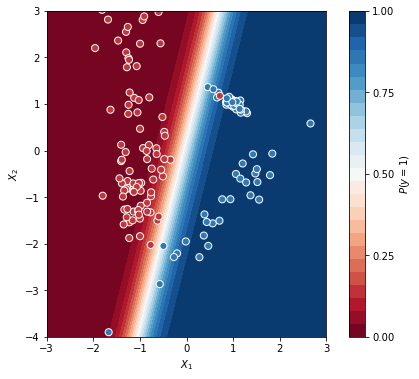

In [134]:
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = LgReg( updated_params,grid).reshape(xx.shape)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X_test[:,0], X_test[:, 1], c=y_test, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-3, 3), ylim=(-4, 3),
       xlabel="$X_1$", ylabel="$X_2$")

Now, let's evaluate our model in different aspects of both classes.
The precision and recall for both classes are high which means the algorithm has more and most relevant results
compared to irrelevant results. The harmonic F1 scores are also good
along with the accuracy. So, together the model is working well
in all aspects of this simple dataset. 

In [135]:
target_names = ['class 0', 'class 1']
classification_report(y_test,Pred,target_names=target_names,output_dict=True)

{'class 0': {'precision': 0.9880952380952381,
  'recall': 0.9880952380952381,
  'f1-score': 0.9880952380952381,
  'support': 84},
 'class 1': {'precision': 0.9848484848484849,
  'recall': 0.9848484848484849,
  'f1-score': 0.9848484848484849,
  'support': 66},
 'accuracy': 0.9866666666666667,
 'macro avg': {'precision': 0.9864718614718615,
  'recall': 0.9864718614718615,
  'f1-score': 0.9864718614718615,
  'support': 150},
 'weighted avg': {'precision': 0.9866666666666667,
  'recall': 0.9866666666666667,
  'f1-score': 0.9866666666666667,
  'support': 150}}

From the confusion matrix we can see that, only one from each class is
misclassified.

In [136]:
confusion_matrix(y_test,Pred)

array([[83,  1],
       [ 1, 65]], dtype=int64)

Finally, we plot the AUC_ROC curve, which is False Positive Rate
vs True Positive Rate. We can see that AUC gets to close to one value quickly. It tells that our model is capable of distinguishing between classes pretty well.

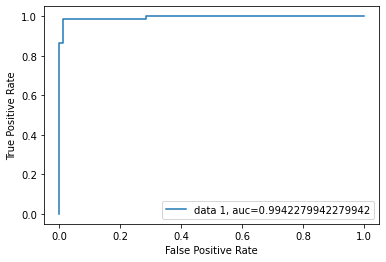

In [155]:
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn import metrics

y_true =y_test # ground truth labels
y_probas =pred # predicted probabilities generated by sklearn classifier
fpr, tpr, _ = metrics.roc_curve(y_test,  y_probas)
auc = metrics.roc_auc_score(y_test, y_probas)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()